# Regression and Classification with the Ames Housing Data

---

## Premise: 
I have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

## Data:
The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt

## Objective:
1. Develop an algorithm to estimate the value of the residential homes based on fixed characteristics (those that are not considered easy to renovate).
2. Identify characteristics of homes that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Use the information to buy homes that are likely to sell for more than the initial purchase.

## Process:
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize and evaluate the model. (How does it perform and what are the best estimates of price?)

## Citations:
- http://www.remodeling.hw.net/cost-vs-value/2010/west-north-central/des-moines-ia/
- http://cdnassets.hw.net/b6/3d/047accdd4174a4965051631d7900/cvv-2010-2011-professional-desmoinesia.pdf

In [1]:
!pip install display --quiet

In [2]:
import sys
import numpy as np, pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt, seaborn as sns

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Load and Inspect the Data

In [3]:
from os import chdir

In [4]:
pwd

'/home/jovyan/DSI/DSI_Plus_1_Curriculum/project-three/project-three/ipynb'

In [5]:
chdir('../')

In [6]:
from library import functions as fy

In [7]:
X_train = pd.read_pickle('./assets/X_train.p')
X_train.shape

(1221, 146)

In [8]:
X_test = pd.read_pickle('./assets/X_test.p')
X_test.shape

(164, 146)

In [9]:
import pickle

In [10]:
y_test = pickle.load(open('./y_test.p', 'rb'))
y_test.shape

(164,)

In [11]:
y_train = pickle.load(open('./y_train.p', 'rb'))
y_train.shape

(1221,)

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1221 entries, 0 to 1459
Columns: 146 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(2), int64(18), uint8(126)
memory usage: 350.6 KB


With 141 features, run a feature-selection model to determine which features are the best predictors for `SalePrice`.

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.feature_selection import SelectKBest, SelectFromModel, f_regression
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [25]:
np.random.seed(42)

In [33]:
rfr_pipe = Pipeline([
    ('skb', SelectKBest(score_func=f_regression)),
    ('scaler', StandardScaler()),
    ('sfm', SelectFromModel(Lasso())),
    ('rfr', RandomForestRegressor(n_jobs=-1)),
])

In [102]:
rfr_param = {
    'skb__k' : [75, 60, 50],
    'sfm__estimator' : [Lasso(alpha=a) for a in np.linspace(60,100,5)],
    'rfr__n_estimators' : [25, 35, 50],
    'rfr__max_depth' : [175, 200, 225],
}

In [103]:
rfr_gs = GridSearchCV(rfr_pipe, param_grid=rfr_param, cv=ShuffleSplit(n_splits=5), n_jobs=-1)

In [172]:
rfr_gs.fit(X_train, y_train)

AttributeError: 'GridSearchCV' object has no attribute 'fit_transform'

In [105]:
pd.DataFrame(rfr_gs.cv_results_).sort_values(by='rank_test_score').T

,60,3,50,58,40,120,32,35,103,88,...,84,31,68,2,61,24,108,1,93,49
mean_fit_time,0.516865,0.427469,0.39918,0.38372,0.589892,0.603894,0.563102,0.572307,0.418721,0.62332,...,0.662216,0.613194,0.49073,0.357602,0.470174,0.48128,0.417008,0.431252,0.390284,0.370319
mean_score_time,0.102159,0.101996,0.102446,0.102162,0.104037,0.102697,0.104437,0.102229,0.102143,0.102055,...,0.103671,0.102731,0.104644,0.102037,0.102845,0.102628,0.105528,0.102063,0.106175,0.102029
mean_test_score,0.863658,0.856757,0.856275,0.855745,0.855209,0.854588,0.854413,0.854366,0.853746,0.85348,...,0.832042,0.831563,0.830095,0.828783,0.827928,0.827436,0.827223,0.827077,0.825478,0.82434
mean_train_score,0.974531,0.974751,0.971454,0.971884,0.975864,0.974029,0.975133,0.974758,0.973071,0.975231,...,0.973782,0.97431,0.972493,0.973238,0.973755,0.973437,0.971827,0.971889,0.973258,0.971941
param_rfr__max_depth,200,175,200,200,175,225,175,175,225,200,...,200,175,200,175,200,175,225,175,225,200
param_rfr__n_estimators,35,25,25,25,50,50,50,50,25,50,...,50,50,35,25,35,35,35,25,25,25
param_sfm__estimator,"Lasso(alpha=60.0, copy_X=True, fit_intercept=T...","Lasso(alpha=70.0, copy_X=True, fit_intercept=T...","Lasso(alpha=70.0, copy_X=True, fit_intercept=T...","Lasso(alpha=100.0, copy_X=True, fit_intercept=...","Lasso(alpha=90.0, copy_X=True, fit_intercept=T...","Lasso(alpha=60.0, copy_X=True, fit_intercept=T...","Lasso(alpha=60.0, copy_X=True, fit_intercept=T...","Lasso(alpha=70.0, copy_X=True, fit_intercept=T...","Lasso(alpha=100.0, copy_X=True, fit_intercept=...","Lasso(alpha=100.0, copy_X=True, fit_intercept=...",...,"Lasso(alpha=90.0, copy_X=True, fit_intercept=T...","Lasso(alpha=60.0, copy_X=True, fit_intercept=T...","Lasso(alpha=80.0, copy_X=True, fit_intercept=T...","Lasso(alpha=60.0, copy_X=True, fit_intercept=T...","Lasso(alpha=60.0, copy_X=True, fit_intercept=T...","Lasso(alpha=90.0, copy_X=True, fit_intercept=T...","Lasso(alpha=70.0, copy_X=True, fit_intercept=T...","Lasso(alpha=60.0, copy_X=True, fit_intercept=T...","Lasso(alpha=70.0, copy_X=True, fit_intercept=T...","Lasso(alpha=70.0, copy_X=True, fit_intercept=T..."
param_skb__k,75,75,50,60,60,75,50,50,60,60,...,75,60,50,50,60,75,75,60,75,60
params,"{'rfr__max_depth': 200, 'rfr__n_estimators': 3...","{'rfr__max_depth': 175, 'rfr__n_estimators': 2...","{'rfr__max_depth': 200, 'rfr__n_estimators': 2...","{'rfr__max_depth': 200, 'rfr__n_estimators': 2...","{'rfr__max_depth': 175, 'rfr__n_estimators': 5...","{'rfr__max_depth': 225, 'rfr__n_estimators': 5...","{'rfr__max_depth': 175, 'rfr__n_estimators': 5...","{'rfr__max_depth': 175, 'rfr__n_estimators': 5...","{'rfr__max_depth': 225, 'rfr__n_estimators': 2...","{'rfr__max_depth': 200, 'rfr__n_estimators': 5...",...,"{'rfr__max_depth': 200, 'rfr__n_estimators': 5...","{'rfr__max_depth': 175, 'rfr__n_estimators': 5...","{'rfr__max_depth': 200, 'rfr__n_estimators': 3...","{'rfr__max_depth': 175, 'rfr__n_estimators': 2...","{'rfr__max_depth': 200, 'rfr__n_estimators': 3...","{'rfr__max_depth': 175, 'rfr__n_estimators': 3...","{'rfr__max_depth': 225, 'rfr__n_estimators': 3...","{'rfr__max_depth': 175, 'rfr__n_estimators': 2...","{'rfr__max_depth': 225, 'rfr__n_estimators': 2...","{'rfr__max_depth': 200, 'rfr__n_estimators': 2..."
rank_test_score,1,2,3,4,5,6,7,8,9,10,...,126,127,128,129,130,131,132,133,134,135


In [106]:
rfr_gs.best_params_

{'rfr__max_depth': 200,
 'rfr__n_estimators': 35,
 'sfm__estimator': Lasso(alpha=60.0, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=None,
    selection='cyclic', tol=0.0001, warm_start=False),
 'skb__k': 75}

In [107]:
rfr_gs.score(X_train, y_train)

0.97867488720290607

In [108]:
rfr_gs.score(X_test, y_test)

0.85581053273401853

In [109]:
rfr_gs.best_estimator_.named_steps

{'rfr': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=200,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=35, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'sfm': SelectFromModel(estimator=Lasso(alpha=60.0, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=None,
    selection='cyclic', tol=0.0001, warm_start=False),
         prefit=False, threshold=None),
 'skb': SelectKBest(k=75, score_func=<function f_regression at 0x7f12cfa1d378>)}

In [110]:
rfr_gs.best_estimator_.named_steps['skb'].get_support().sum()

75

In [111]:
rfr_gs.best_estimator_.named_steps['sfm'].get_support().sum()

68

In [112]:
rfr_gs.best_estimator_.named_steps['rfr'].n_features_

68

The model's SelectKBest was applied to feature-select based on f-regression using the f-test. This narrowed the 146 features to 75, and then the `Lasso` regularizatoin method applied in `SelectFromModel` reduced the number of relevant features from 75 to 68. 

In [159]:
skb = rfr_gs.best_estimator_.named_steps['skb'].get_support()
skb

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False, False, False,  True, False,  True,  True,  True, False,
       False, False, False,  True, False,  True,  True,  True, False,
        True,  True, False, False,  True,  True, False,  True,  True,
        True, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False,  True,  True, False,
       False, False,  True, False,  True,  True, False,  True, False,
       False,  True,  True,  True, False,  True, False,  True,  True,
        True, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True, False,  True,  True, False,
       False, False,  True,  True, False,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True, False,  True,
       False,  True,

In [163]:
skb_features = X_train.columns[skb]
skb_features
# these are the selected features from SelectKBest

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'PoolArea', 'MSSubClass_30', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_90', 'MSSubClass_160',
       'MSSubClass_180', 'MSSubClass_190', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR1', 'LotShape_IR2', 'LotShape_Reg', 'LandContour_Bnk',
       'LandContour_HLS', 'LotConfig_CulDSac', 'LotConfig_Inside',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_NAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Condition1_Artery', 'Condition1_Feedr',
       'Condition1_Norm', 'BldgType_1Fam', '

In [160]:
lasso = rfr_gs.best_estimator_.named_steps['sfm'].get_support()

In [165]:
lasso_features = X_train.columns[lasso]
lasso_features

/opt/conda/lib/python3.6/site-packages/pandas/indexes/base.py:1434: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 146 but corresponding boolean dimension is 75
  result = getitem(key)


Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'PoolArea', 'YrSold', 'MSSubClass_20',
       'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50',
       'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80',
       'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160',
       'MSSubClass_180', 'MSSubClass_190', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod',
       'Neighbo

In [210]:
rfr = rfr_gs.best_estimator_.named_steps['rfr'].feature_importances_
display(len(rfr))
top11_rfr_features = rfr > 0.0125
display((rfr > 0.0125).sum())
display(top11_rfr_features)

68

11

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False], dtype=bool)

In [215]:
feature_indices = np.where(rfr>0.0125) 
feature_indices
# gives the array index for where the important features are that are > 0.0125.

(array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 58]),)

In [212]:
rfr_features = lasso_features[feature_indices]
rfr_features

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'Neighborhood_BrkSide'],
      dtype='object')

In [217]:
rfr_coefs = rfr[feature_indices]
rfr_coefs

array([ 0.01285985,  0.02866097,  0.11039587,  0.02395657,  0.02325568,
        0.12874889,  0.03012697,  0.05785756,  0.34043044,  0.01532522,
        0.15265564])

In [223]:
top11_features = pd.DataFrame(list(zip(rfr_features, rfr_coefs)), columns = ['feature', 'importance'])
top11_features

,feature,importance
0,LotFrontage,0.012860
1,LotArea,0.028661
2,YearBuilt,0.110396
3,YearRemodAdd,0.023957
4,BsmtFinSF1,0.023256
5,BsmtUnfSF,0.128749
6,TotalBsmtSF,0.030127
7,1stFlrSF,0.057858
8,2ndFlrSF,0.340430
9,GrLivArea,0.015325


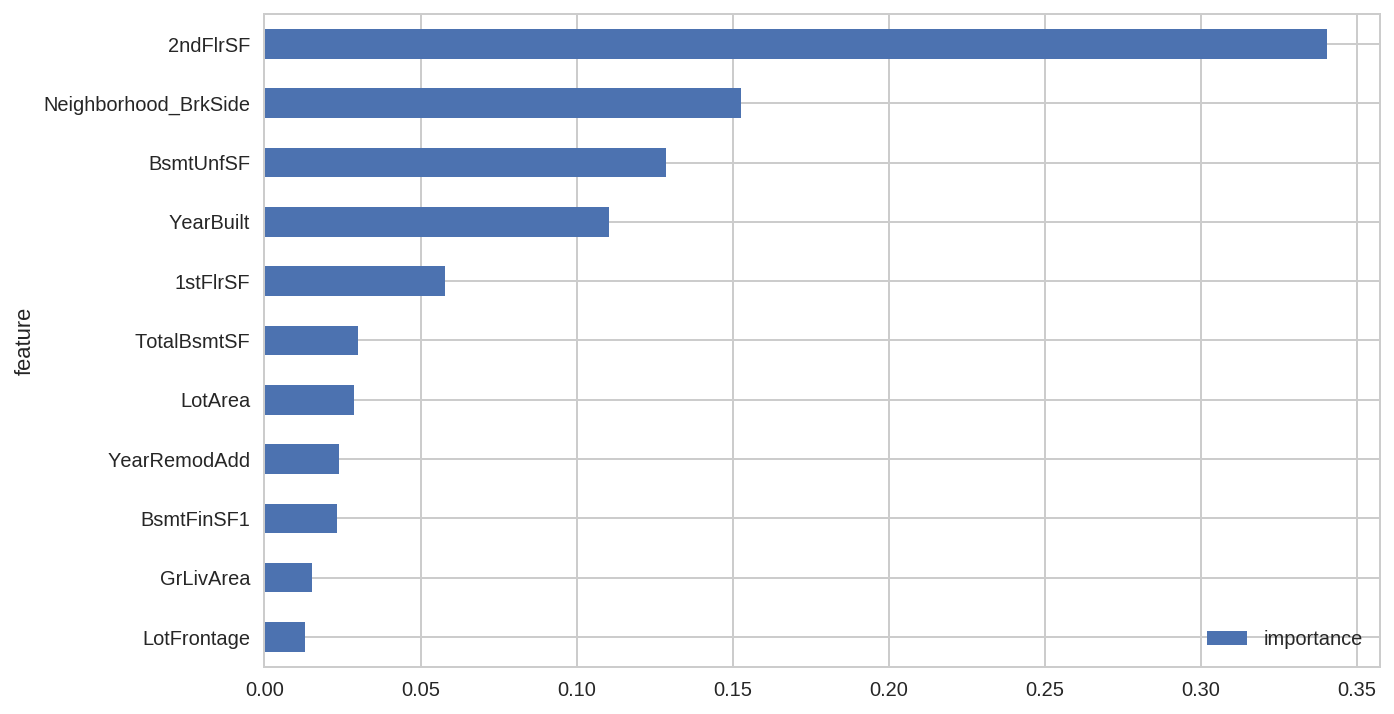

In [231]:
top11_features.sort_values('importance', ascending=True).plot(x = 'feature', y='importance', kind='barh',\
                                                               figsize=(10,6))
plt.show()

In [ ]:
clean_house_df = pd.read_pickle('./assets/clean_house_df.p')

In [ ]:
clean_house_df.sample(5)

**The size of my dataset is 3.2 MB as shown below:**

In [ ]:
sys.getsizeof(clean_house_df)/1000000

### Understanding the Objective

In order to meet the 1st objective (which is to build a model using the fixed (not easily renovatable) features to predict the value of a residential home (`SalePrice`), I did some research online to help me roughly determine what features are considered difficult to renovate. My research led me to the following website and pdf:
    - http://www.remodeling.hw.net/cost-vs-value/2010/west-north-central/des-moines-ia/
    - http://cdnassets.hw.net/b6/3d/047accdd4174a4965051631d7900/cvv-2010-2011-professional-desmoinesia.pdf
Together with the data dictionary, the following features were categorized into the following 3 categories:
- features that cannot be changed
- features that are difficult to fix
- features that are less difficult to fix

In [ ]:
clean_house_df.columns

In [ ]:
clean_house_df.drop('MiscVal', axis=1, inplace=True)

In [ ]:
len(clean_house_df.columns)

In [ ]:
cannot_change = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour',\
                 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', \
                 'HouseStyle','YearBuilt', 'YearRemodAdd', 'Foundation', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2', \
                 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageType', 'GarageYrBlt',\
                 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',\
                 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']

In [ ]:
lesshardtofix = ['BsmtFinSF1', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF',  'KitchenQual',\
                'TotRmsAbvGrd', 'GarageFinish', 'GarageQual', 'PavedDrive',]

In [ ]:
import pickle

In [ ]:
pickle.dump(lesshardtofix, open('lesshardtofix.p', 'wb'))

In [ ]:
hardtofix = ['OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl','Exterior1st', 'ExterQual','ExterCond',\
             'MasVnrType', 'MasVnrArea', 'BsmtExposure', 'BsmtFullBath', 'BsmtHalfBath', \
             'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Functional', 'Fireplaces', 'GarageArea',]

In [ ]:
pickle.dump(hardtofix, open('hardtofix.p', 'wb'))

In [ ]:
display(len(cannot_change))
display(len(lesshardtofix))
display(len(hardtofix))

### Examine the non-renovatable features of a home to estimate home value

In [ ]:
cannot_change_df = clean_house_df[cannot_change] 
cannot_change_df.shape

In [ ]:
cannot_change_df.columns

#### Define the target `SalePrice` and the predictive features

In [ ]:
y = cannot_change_df['SalePrice']

In [ ]:
X = clean_house_df[cannot_change].drop(['SalePrice', 'Id'], axis=1)

In [ ]:
display(X.shape)
display(y.shape)

In [ ]:
X['YrSold'].value_counts()

#### Do a manual train/test/split where if the Yr Sold is 2010, then it is the train set, otherwise if the year sold is 2006-2009, then it is in the train set.

In [ ]:
X_test = X[X['YrSold'] == 2010]
X_train = X[X['YrSold'] != 2010]

In [ ]:
display(X_test.shape)
display(X_train.shape)

In [ ]:
y_test = cannot_change_df[cannot_change_df['YrSold'] == 2010]['SalePrice']
y_test.shape

In [ ]:
y_train = cannot_change_df[cannot_change_df['YrSold'] != 2010]['SalePrice']
y_train.shape

In [ ]:
pickle.dump(y_test, open('y_test.p', 'wb'))
pickle.dump(y_train, open('y_train.p', 'wb'))

There are some features that are categorial, while there are others that are numeric. In order to enhance the performance of a regression model, I will convert the categorial fetaures to numeric by using pandas `get_dummies`. Below, I separate out the cateogiral from the numeric feature based on the data dictionary.

In [ ]:
display(X.columns)
display(len(X.columns))

In [ ]:
fixed_categorical = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', \
                 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'Foundation',\
                'BsmtQual', 'GarageType', 'SaleType']
display(len(fixed_categorical))

In [ ]:
fixed_numeric = [column for column in X.columns if column not in fixed_categorical]
display(len(fixed_numeric))

In [ ]:
X_dummies_df = pd.get_dummies(data = X, columns = fixed_categorical)

In [ ]:
display(X_dummies_df.shape)
display(X_dummies_df.head())

In [ ]:
X_test = X_dummies_df[X_dummies_df['YrSold'] == 2010]
display(X_test.shape)
X_train = X_dummies_df[X_dummies_df['YrSold'] != 2010]
display(X_train.shape)

In [ ]:
X_test.to_pickle('./assets/X_test.p')

In [ ]:
X_train.to_pickle('./assets/X_train.p')